In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
cyberpunkforums=pd.read_json('result/json/cyberpunkforums.json')

In [5]:
cyberpunkforums.head()

,postId,postNb,postDate,content,blockquote,img,links,categorie,topic,Year
0,p60291,1,1640736000000,[Scientists convinced a petri dish of brain ce...,[],[],[https://ftw.usatoday.com/2021/12/scient],Subversion,Human brain cells in a dish are playing pong,2021
1,p60298,2,1640995200000,"[Things seem kind of slow here, which is cool ...",[],[https://cyberpunkforums.com/img/smilies/lol.gif],[],Subversion,Human brain cells in a dish are playing pong,2022
2,p60300,3,1640995200000,[At least the learning curve is quicker than t...,[],[],[],Subversion,Human brain cells in a dish are playing pong,2022
3,p60370,4,1642636800000,[Can't wait for my brain to be chopped up and ...,[],[],[],Subversion,Human brain cells in a dish are playing pong,2022
4,p60378,5,1642723200000,[Welcome welcome],[Can't wait for my brain to be chopped up and ...,[],[],Subversion,Human brain cells in a dish are playing pong,2022


In [6]:
len(cyberpunkforums.Year.unique())

12

In [7]:
cyberpunkforums.Year.unique()

array([2021, 2022, 2018, 2019, 2020, 2012, 2011, 2013, 2015, 2014, 2017,
       2016], dtype=int64)

In [8]:
cyberpunkforums['content']=cyberpunkforums.apply(lambda x: str(x['content']).replace('[','').replace(']',''),axis=1)

In [9]:
cyberpunkforums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53369 entries, 0 to 53368
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   postId      53369 non-null  object
 1   postNb      53369 non-null  int64 
 2   postDate    53369 non-null  int64 
 3   content     53369 non-null  object
 4   blockquote  53369 non-null  object
 5   img         53369 non-null  object
 6   links       53369 non-null  object
 7   categorie   53369 non-null  object
 8   topic       53369 non-null  object
 9   Year        53369 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 4.1+ MB


In [10]:
cyberpunkforums.head(2)

,postId,postNb,postDate,content,blockquote,img,links,categorie,topic,Year
0,p60291,1,1640736000000,"""Scientists convinced a petri dish of brain ce...",[],[],[https://ftw.usatoday.com/2021/12/scient],Subversion,Human brain cells in a dish are playing pong,2021
1,p60298,2,1640995200000,"""Things seem kind of slow here, which is cool ...",[],[https://cyberpunkforums.com/img/smilies/lol.gif],[],Subversion,Human brain cells in a dish are playing pong,2022


###  处理分词等数据

In [11]:
import nltk
import string
# English Preprocessing Base
from nltk.stem import WordNetLemmatizer
# nltk.download('words')

In [12]:
# nltk.download([
#      "names",
#     "stopwords",
#     "state_union",
#     "twitter_samples",
#      "movie_reviews",
#     "averaged_perceptron_tagger",
#     "vader_lexicon",
#     "punkt",
# ])

In [13]:
# English Pre-processing
stopwords = nltk.corpus.stopwords.words('english')
Ewords = set(nltk.corpus.words.words())
Englishlemmatizer = WordNetLemmatizer()


In [14]:

# Define English Pre-processing Function
def Preprocess_list_of_English_Sentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())
        
        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]
        
        words_lemmatize = (Englishlemmatizer.lemmatize(w) for w in words_w_stopwords)
        
        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in Ewords or not w.isalpha())
        # rebuild the text
        preprocess_list.append(sentence_clean)

    return preprocess_list

In [15]:
cyberpunkforums['content']=Preprocess_list_of_English_Sentence(cyberpunkforums['content'])

In [16]:
cyberpunkforums.head(2)

,postId,postNb,postDate,content,blockquote,img,links,categorie,topic,Year
0,p60291,1,1640736000000,scientist convinced dish brain cell theyre pad...,[],[],[https://ftw.usatoday.com/2021/12/scient],Subversion,Human brain cells in a dish are playing pong,2021
1,p60298,2,1640995200000,thing seem kind slow cool kind slow however im...,[],[https://cyberpunkforums.com/img/smilies/lol.gif],[],Subversion,Human brain cells in a dish are playing pong,2022


In [17]:
#cyberpunkforums.to_csv('result/csv1/cyberpunkforums.csv')

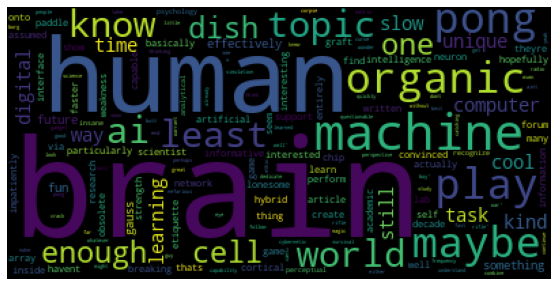

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib

text = cyberpunkforums['content'].values 
matplotlib.rcParams['figure.figsize']=(10.0,5.0)

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 词频统计

In [19]:
fd = nltk.FreqDist(cyberpunkforums['content'])
fd.most_common(10)

[('', 2895),
 ('welcome', 47),
 ('thanks', 44),
 ('nice', 43),
 ('thank', 30),
 ('yes', 28),
 ('yeah', 24),
 ('like', 22),
 ('love', 22),
 ('cool', 22)]

### 情感分析，方法一

In [22]:
!pip install snownlp

In [23]:
from textblob import TextBlob
from snownlp import SnowNLP

In [24]:
from textblob import TextBlob
blob = TextBlob(cyberpunkforums['content'][2])
blob

TextBlob("least learning curve ai little boy")

In [25]:
blob.sentences

[Sentence("least learning curve ai little boy")]

In [26]:
blob.sentiment

Sentiment(polarity=-0.24375, subjectivity=0.45)

In [27]:
blob.sentiment[0]

-0.24375

In [28]:
text = cyberpunkforums['content'].iloc[2]

In [29]:
from snownlp import SnowNLP
s = SnowNLP(text)

In [30]:
s.sentiments

0.1956519142229829

In [31]:
def get_sentiment_en(text):
    s = TextBlob(text).sentiment[0]
    return s

In [32]:
vrow = cyberpunkforums.shape[0]
cyberpunkforums["sentiment"] = cyberpunkforums.content.apply(get_sentiment_en)
cyberpunkforums["sentiment"].unique()

array([-0.09166667,  0.14479167, -0.24375   , ...,  0.16333333,
       -0.01142857,  0.29305556])

In [33]:
for i in range(vrow):
    text = cyberpunkforums['content'].iloc[i]
    cyberpunkforums["sentiment"][i]=get_sentiment_en(text)
    

<ipython-input-33-395269e15e33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyberpunkforums["sentiment"][i]=get_sentiment_en(text)


In [34]:
#cyberpunkforums["sentiment"] = cyberpunkforums.content.apply(get_sentiment_en)

In [35]:
cyberpunkforums.head(4)

,postId,postNb,postDate,content,blockquote,img,links,categorie,topic,Year,sentiment
0,p60291,1,1640736000000,scientist convinced dish brain cell theyre pad...,[],[],[https://ftw.usatoday.com/2021/12/scient],Subversion,Human brain cells in a dish are playing pong,2021,-0.091667
1,p60298,2,1640995200000,thing seem kind slow cool kind slow however im...,[],[https://cyberpunkforums.com/img/smilies/lol.gif],[],Subversion,Human brain cells in a dish are playing pong,2022,0.144792
2,p60300,3,1640995200000,least learning curve ai little boy,[],[],[],Subversion,Human brain cells in a dish are playing pong,2022,-0.243750
3,p60370,4,1642636800000,cant wait brain chopped turned organic latest,[],[],[],Subversion,Human brain cells in a dish are playing pong,2022,0.500000


In [36]:
np.argmin(cyberpunkforums["sentiment"])

2357

In [37]:
cyberpunkforums["content"][2357]

'worst sneaking'

In [38]:
sum_sent = cyberpunkforums.groupby(by=["Year"]).sum()["sentiment"]
mean_sent = cyberpunkforums.groupby(by=["Year"]).mean()["sentiment"]

In [39]:
years = np.arange(2011,2023,1)
print(years)

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


<BarContainer object of 12 artists>

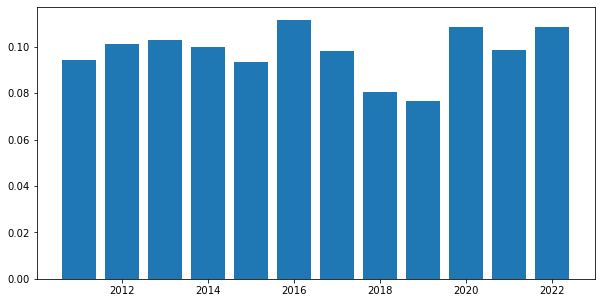

In [40]:
plt.bar(years,mean_sent)

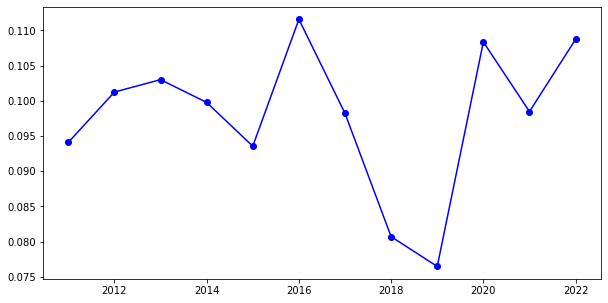

In [41]:
plt.plot(years,mean_sent,'bo-',label='type2')

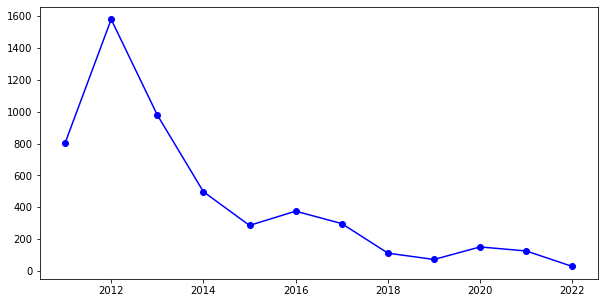

In [42]:
plt.plot(years,sum_sent,'bo-',label='type2')

In [43]:
cyberpunkforums.to_csv('result/csv1/cyberpunkforums.csv')

### 情感分析方法2

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(cyberpunkforums['content'].iloc[1])

{'neg': 0.117, 'neu': 0.608, 'pos': 0.275, 'compound': 0.9814}

In [45]:
def get_sentiment_en1(text):
    sia = SentimentIntensityAnalyzer()
    s1=sia.polarity_scores(text)
    return s1

In [46]:
cyberpunkforums["sentiment_nlyk"] = cyberpunkforums.content.apply(get_sentiment_en1)

In [47]:
cyberpunkforums.head(2)

,postId,postNb,postDate,content,blockquote,img,links,categorie,topic,Year,sentiment,sentiment_nlyk
0,p60291,1,1640736000000,scientist convinced dish brain cell theyre pad...,[],[],[https://ftw.usatoday.com/2021/12/scient],Subversion,Human brain cells in a dish are playing pong,2021,-0.091667,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
1,p60298,2,1640995200000,thing seem kind slow cool kind slow however im...,[],[https://cyberpunkforums.com/img/smilies/lol.gif],[],Subversion,Human brain cells in a dish are playing pong,2022,0.144792,"{'neg': 0.117, 'neu': 0.608, 'pos': 0.275, 'co..."


### Reddit


In [48]:
reddit4=pd.read_json('result/json/reddit4.json')

In [49]:
reddit4.head(2)

,title,date,text,Comment,vote,image,Year
0,HK : wearable face projector to avoid face rec...,2020-03-01,[],"[Thats cool, but how blinded are you wearing t...",54500,None,2020
1,Akira Gif,2018-03-02,[],"[The first thing I thought was ""hey look, actu...",10000,https://i.imgur.com/enfw4eu.gif,2018


In [50]:
reddit4["Comment"]=reddit4.apply(lambda x: str(x['Comment']).replace('[','').replace(']',''),axis=1)

In [51]:
reddit4["Comment"]=Preprocess_list_of_English_Sentence(reddit4["Comment"])

In [52]:
reddit4.head(2)

,title,date,text,Comment,vote,image,Year
0,HK : wearable face projector to avoid face rec...,2020-03-01,[],thats cool blinded wearing said eye pull yep a...,54500,None,2020
1,Akira Gif,2018-03-02,[],first thing thought hey look actual top thats ...,10000,https://i.imgur.com/enfw4eu.gif,2018


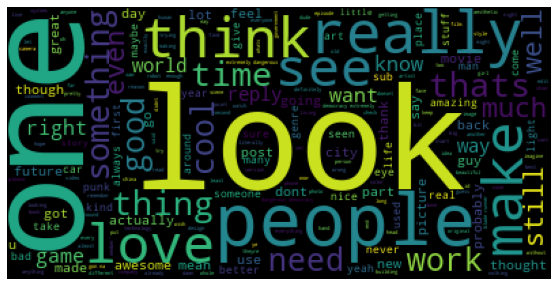

In [53]:
text = reddit4["Comment"].values 
matplotlib.rcParams['figure.figsize']=(10.0,5.0)

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [54]:
vrow = reddit4.shape[0]
reddit4["sentiment"] = reddit4.Comment.apply(get_sentiment_en)

In [55]:
for i in range(vrow):
    text = reddit4["Comment"] .iloc[i]
    reddit4["sentiment"][i]=get_sentiment_en(text)

<ipython-input-55-5256e75a3b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit4["sentiment"][i]=get_sentiment_en(text)


In [56]:
reddit4.head(3)

,title,date,text,Comment,vote,image,Year,sentiment
0,HK : wearable face projector to avoid face rec...,2020-03-01,[],thats cool blinded wearing said eye pull yep a...,54500,None,2020,0.036216
1,Akira Gif,2018-03-02,[],first thing thought hey look actual top thats ...,10000,https://i.imgur.com/enfw4eu.gif,2018,0.212592
2,Tron rollercoaster Shanghai Disneyland giving ...,2018-03-02,[],tron legacy rated film story might bit pull pu...,7700,https://i.redd.it/yxomyotbcvd11.jpg,2018,0.065008


In [57]:
np.argmin(reddit4["sentiment"])

122

In [58]:
reddit4["Comment"][122]

'real unedited local news thats concerning say least ’ right extremely dangerous democracy numerous local station regularly script yes one company control hundred local news station around country right wing bias onto station require station air documentary virus china week ago public scrutiny criticism back lobby heavily law limiting concentration medium ownership real threat democracy happening decade yes group large number local news network station occasionally air segment propaganda time lot news station ’ name get script medium group local news station u extremely conservative organization force station air must air piece like medium ago reply script local news show heavily right wing time time report conspiracy theory worst part people paying subscription sending script local affiliate bad abnormal local station report national event dont people scene address obviously becomes problem source local report dont let apostrophe terrorist win scale majority major news source handful 

In [59]:
reddit4.to_csv('result/csv1/reddit4.csv')

### sffworld

In [60]:
sffworld=pd.read_json('result/json/sffworld.json')

In [62]:
sffworld.head()

,username,date,title,replies,views,text,Year
0,nposecznick,2016-01-15,Novels with Shadowrun-like setting?,0,74,I was wondering if any of you could recommend ...,2016
1,SFFWorld,2021-10-12,New post - A SPINDLE SPLINTERED by Alix E. Har...,6,248,Alix Harrow is a writer whose work has shown t...,2021
2,KatG,2021-01-28,Authors We've Lost -- Storm Constantine and An...,6,359,"I meant to get something up on this earlier, b...",2021
3,SFFWorld,2020-11-03,New post - THE ONCE AND FUTURE WITCHES by Alix...,3,274,Sisterhood. Women’s rights. Personhood. Witche...,2020
4,Sfinx,2020-07-23,Tips for summer holiday reading?,14,746,"Hey all, Leaving soon for a couple of weeks of...",2020


In [63]:
sffworld["text"]=Preprocess_list_of_English_Sentence(sffworld["text"])

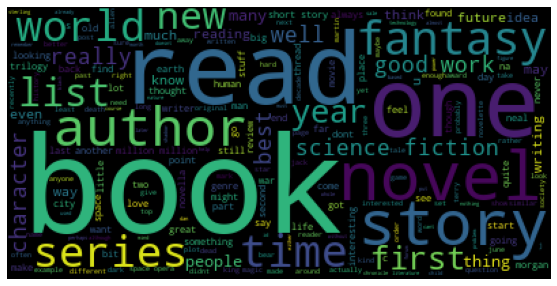

In [64]:
text = sffworld["text"].values 
matplotlib.rcParams['figure.figsize']=(10.0,5.0)

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [65]:
vrow = sffworld.shape[0]
sffworld["sentiment"] = sffworld.text.apply(get_sentiment_en)

In [66]:
for i in range(vrow):
    text = sffworld["text"] .iloc[i]
    sffworld["sentiment"][i]=get_sentiment_en(text)

<ipython-input-66-8ee1c521e857>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sffworld["sentiment"][i]=get_sentiment_en(text)


In [67]:
sffworld.head()

,username,date,title,replies,views,text,Year,sentiment
0,nposecznick,2016-01-15,Novels with Shadowrun-like setting?,0,74,wondering could recommend good book similar se...,2016,0.237500
1,SFFWorld,2021-10-12,New post - A SPINDLE SPLINTERED by Alix E. Har...,6,248,harrow writer whose work shown power story ’ r...,2021,0.050000
2,KatG,2021-01-28,Authors We've Lost -- Storm Constantine and An...,6,359,meant get something let people fantasy author ...,2021,0.140000
3,SFFWorld,2020-11-03,New post - THE ONCE AND FUTURE WITCHES by Alix...,3,274,sisterhood woman ’ right witch harrow ’ second...,2020,0.087143
4,Sfinx,2020-07-23,Tips for summer holiday reading?,14,746,hey leaving soon couple week sun sea plenty ti...,2020,-0.250000


In [68]:
sffworld.to_csv('result/csv1/sffworld.csv')

### usenet

In [69]:
usenet=pd.read_json('result/json/usenet.json')

In [70]:
usenet.head()

,content,date_post,comment,idPost,replyTo,idTopic,titleTopic,Year
0,News Flash!! Back issues of the special Cyber...,572054400000,[],bba8a573-1471-460a-8b73-f904d6219eaf,0,PDI2MDdAaGFkZG9jay5JU0MuQ09NPg,Science Fiction EYE,1988
1,"10. The Court's Final Judgement, Order, and De...",742521600000,[],166b50d0-432c-43b2-a180-f5daf1b95d43,0,PDkzMDcxMzA2MjMuQUEwMTI4OEBwcmltdXMuY29tPg,"TLU&TN2 #10: The Court's Final Judgment, Order...",1993
2,"Reprinted from The Globe and Mail, Thursday Ma...",576806400000,[],e44431c8-c337-4601-ba99-ecbc38dbb1c5,0,PDM5ODRAd2F0Y2dsLndhdGVybG9vLmVkdT4,Cyberpunk approaches reality,1988
3,Awhile back I posted an article asking for spe...,564019200000,[],9cd86c17-11ad-40b9-aef5-4d11e1985adf,0,PDE3MDdAaGFkZG9jay5JU0MuQ09NPg,Future Police -- thanks!,1987
4,I hate to bother any of you out there with thi...,577065600000,[],953a59b6-ac8f-47d5-aa00-80423bf4bd9c,0,PDM5NDU1Q09LQFBTVVZNQT4,This group,1988


In [71]:
usenet["content"]=Preprocess_list_of_English_Sentence(usenet["content"])

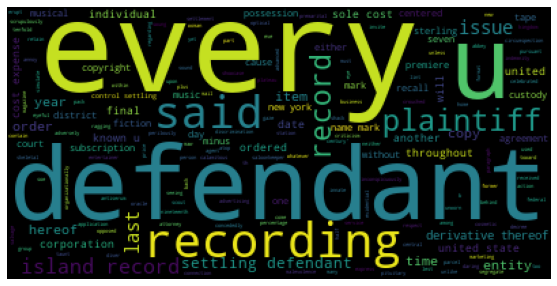

In [72]:
text = usenet["content"].values 
matplotlib.rcParams['figure.figsize']=(10.0,5.0)

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [73]:
vrow = usenet.shape[0]
usenet["sentiment"] = usenet.content.apply(get_sentiment_en)

In [74]:
for i in range(vrow):
    text =  usenet["content"] .iloc[i]
    usenet["sentiment"][i]=get_sentiment_en(text)

<ipython-input-74-94a5c44b757d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usenet["sentiment"][i]=get_sentiment_en(text)


In [75]:
usenet.head()

,content,date_post,comment,idPost,replyTo,idTopic,titleTopic,Year,sentiment
0,news flash back issue special premiere science...,572054400000,[],bba8a573-1471-460a-8b73-f904d6219eaf,0,PDI2MDdAaGFkZG9jay5JU0MuQ09NPg,Science Fiction EYE,1988,0.373347
1,court final order decree united state district...,742521600000,[],166b50d0-432c-43b2-a180-f5daf1b95d43,0,PDkzMDcxMzA2MjMuQUEwMTI4OEBwcmltdXMuY29tPg,"TLU&TN2 #10: The Court's Final Judgment, Order...",1993,0.095362
2,globe mail march without permission kiss chapp...,576806400000,[],e44431c8-c337-4601-ba99-ecbc38dbb1c5,0,PDM5ODRAd2F0Y2dsLndhdGVybG9vLmVkdT4,Cyberpunk approaches reality,1988,0.200000
3,awhile back posted article speculation like re...,564019200000,[],9cd86c17-11ad-40b9-aef5-4d11e1985adf,0,PDE3MDdAaGFkZG9jay5JU0MuQ09NPg,Future Police -- thanks!,1987,0.158824
4,hate bother completely anybody many time trans...,577065600000,[],953a59b6-ac8f-47d5-aa00-80423bf4bd9c,0,PDM5NDU1Q09LQFBTVVZNQT4,This group,1988,-0.122917


In [76]:
usenet.to_csv('result/csv1/usenet.csv')

## 法语处理


In [77]:
booknode=pd.read_json("result/json/booknode.json")

In [78]:
booknode.head()

,topicTitle,commentID,datePost,content,links,img_link,blockquote,nbPostTopic,nbViewsTopic,topicId,datePostTopic,lastUpdateTopic,Year
0,Quel couple préférez-vous dans Red Queen ?,p18443555,1473206400000,Bonjour tout le monde !Si vous êtes comme moi ...,[],"[./images/smilies/icon_mrgreen.gif, ./images/s...",[],24,24,249255,1473206400000,1640995200000,2016
1,Quel couple préférez-vous dans Red Queen ?,p18443935,1473206400000,"Tu n'es pas toute seule, je suis dans la team ...",[],"[./images/smilies/icon_e_biggrin.gif, ./images...",[],24,24,249255,1473206400000,1640995200000,2016
2,Quel couple préférez-vous dans Red Queen ?,p18444005,1473206400000,"Pour ma part, c'est également le couple Mare/M...",[],"[./images/smilies/icon_e_biggrin.gif, ./images...",[],24,24,249255,1473206400000,1640995200000,2016
3,Quel couple préférez-vous dans Red Queen ?,p18446735,1473292800000,BLOCKQUOTEJe crois qu'on a tous eu la même réa...,[],"[./images/smilies/icon_e_sad.gif, ./images/smi...",[LizzieB a écrit :Ce coup de théâtre m'a absol...,24,24,249255,1473206400000,1640995200000,2016
4,Quel couple préférez-vous dans Red Queen ?,p18447085,1473292800000,"Personnellement, j'ai horreur de Cal. Il est p...",[],[],[],24,24,249255,1473206400000,1640995200000,2016


In [81]:
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
def Preprocess_list_of_French_Sentence(listofSentence):
    # French Pre-processing
    french_stopwords = nltk.corpus.stopwords.words('french')
    Fwords = set(line.strip() for line in open('./dictionnaire.txt',encoding="utf-8"))
    Frenchlemmatizer = FrenchLefffLemmatizer()
    
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())
        
        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        words_w_stopwords = [i for i in tokenize_sentence if i not in french_stopwords]
        
        words_lemmatize = (Frenchlemmatizer.lemmatize(w) for w in words_w_stopwords)
        
        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in Fwords or not w.isalpha())
        # rebuild the text
        preprocess_list.append(sentence_clean)

    return preprocess_list

In [82]:
booknode["content"]=Preprocess_list_of_French_Sentence(booknode["content"])

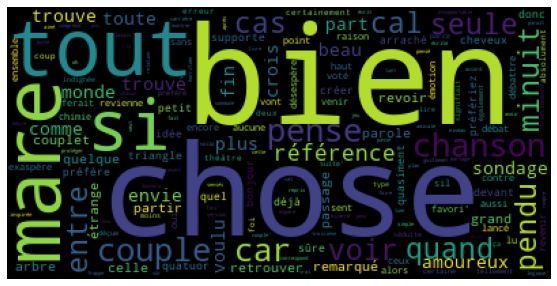

In [83]:
text = booknode['content'].values 
matplotlib.rcParams['figure.figsize']=(10.0,5.0)

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()